In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

train = pd.read_csv('./funda_train.csv')
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0.0,b,2016-06-01,13:13,0.0,NaN,기타 미용업,1857.142857
1,0,1.0,h,2016-06-01,18:12,0.0,NaN,기타 미용업,857.142857
2,0,2.0,c,2016-06-01,18:52,0.0,NaN,기타 미용업,2000.000000
3,0,3.0,a,2016-06-01,20:22,0.0,NaN,기타 미용업,7857.142857
4,0,4.0,c,2016-06-02,11:06,0.0,NaN,기타 미용업,2000.000000


In [2]:
len(train['store_id'].unique())

9

In [3]:
train.isnull().sum()

store_id                0
card_id                 0
card_company            0
transacted_date         0
transacted_time         0
installment_term        0
region              12622
type_of_business    20734
amount                  1
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

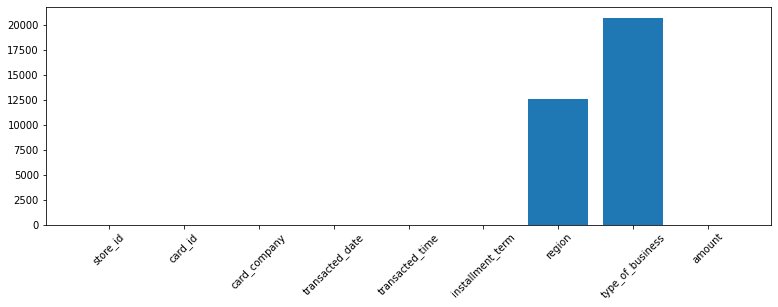

In [4]:
plt.figure(figsize=(13, 4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45)

In [5]:
train = train.drop(['region','type_of_business'],axis=1)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


In [6]:
train.shape

(32021, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


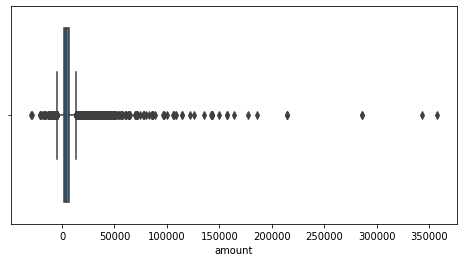

In [7]:
##amount 변수 확인, 음수 확인
plt.figure(figsize=(8, 4))
sns.boxplot(train['amount'])

In [8]:
train[train['amount']<0].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2,-8571.428571
347,0,285,a,2016-08-04,17:52,0,-1857.142857
731,0,473,g,2016-10-17,10:32,0,-2000.000000
831,0,230,b,2016-11-03,15:36,0,-85.714286
944,0,138,a,2016-11-28,13:21,0,-57.142857


datetime 시간 변수 생성

In [9]:
# 거래일와 거래시간을 합친 변수를 생성
## format에 맞게끔
train['datetime'] = pd.to_datetime(train['transacted_date'] + " " + 
                                train['transacted_time'], format='%Y-%m-%d %H:%M:%S') 

In [10]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0,2000.000000,2016-06-02 11:06:00


In [11]:
##eda, 특정 id 하나 당 기준
trial = train[train['store_id']==1]
trial.sort_values('card_id',ascending=True)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
6141,1,544,e,2017-06-30,14:19,0,571.428571,2017-06-30 14:19:00
4481,1,1931,b,2016-06-01,13:31,0,1071.428571,2016-06-01 13:31:00
5870,1,1931,b,2017-04-20,12:56,0,714.285714,2017-04-20 12:56:00
6022,1,1931,b,2017-06-01,12:40,0,571.428571,2017-06-01 12:40:00
4735,1,1931,b,2016-07-26,13:24,0,1000.000000,2016-07-26 13:24:00
...,...,...,...,...,...,...,...,...
8236,1,3424,b,2019-02-22,14:16,0,928.571429,2019-02-22 14:16:00
8241,1,3425,b,2019-02-25,14:15,0,428.571429,2019-02-25 14:15:00
8248,1,3426,a,2019-02-26,13:23,0,1142.857143,2019-02-26 13:23:00
8249,1,3427,a,2019-02-26,13:42,0,1214.285714,2019-02-26 13:42:00


In [12]:
trial.to_records()[:] ## index 포함 numpy array로 반환하는 기능 

rec.array([(4481, 1, 1931, 'b', '2016-06-01', '13:31', 0, 1071.42857143, '2016-06-01T13:31:00.000000000'),
           (4482, 1, 1932, 'h', '2016-06-01', '14:18', 0,  428.57142857, '2016-06-01T14:18:00.000000000'),
           (4483, 1, 1933, 'c', '2016-06-01', '15:07', 0, 1142.85714286, '2016-06-01T15:07:00.000000000'),
           ...,
           (8260, 1, 2845, 'b', '2019-02-28', '13:45', 0,  500.        , '2019-02-28T13:45:00.000000000'),
           (8261, 1, 2917, 'a', '2019-02-28', '14:27', 0,  500.        , '2019-02-28T14:27:00.000000000'),
           (8262, 1, 3423, 'b', '2019-02-28', '16:17', 0, 1000.        , '2019-02-28T16:17:00.000000000')],
          dtype=[('index', '<i8'), ('store_id', '<i8'), ('card_id', '<i8'), ('card_company', 'O'), ('transacted_date', 'O'), ('transacted_time', 'O'), ('installment_term', '<i8'), ('amount', '<f8'), ('datetime', '<M8[ns]')])

In [13]:
for i in trial.to_records()[:]: # 환불 데이터를 차례대로 검사합니다.
            a = i['card_id']

In [14]:
## 환불 거래를 제거하는 함수를 정의합니다.
def remove_refund(df):
    refund = df[df['amount']<0] # 매출액 음숫값 데이터 생성 ->환불 데이터
    non_refund = df[df['amount']>0] # 매출액 양숫값 데이터 생성
    removed_data = pd.DataFrame()
    
    for i in tqdm(df['store_id'].unique()):
        divided_data = non_refund[non_refund['store_id']==i] # 매출액이 양숫값인 데이터에서 상전별로 나누는 섹션
        divided_data2 = refund[refund['store_id']==i] # 매출액이 음숫값인 데이터를 상점별로 나누는 섹션
        for neg in divided_data2.to_records()[:]: # 환불 데이터를 차례대로 검사합니다.
            refund_store = neg['store_id']
            refund_id = neg['card_id'] # 환불 카드 아이디
            refund_datetime = neg['datetime'] # 환불 시간
            refund_amount = abs(neg['amount']) # 매출 음숫값의 절댓값-> 환불 값
            ## 환불 시간 이전의 데이터 중 카드 이이디와 환불액이 같은 후보 리스트를 뽑습니다.
            refund_pay_list = divided_data[divided_data['datetime']<=refund_datetime]
            refund_pay_list = refund_pay_list[refund_pay_list['card_id']==refund_id]
            refund_pay_list = refund_pay_list[refund_pay_list['amount']==refund_amount]
                     
            # 후보 리스트가 있으면 카드 아이디, 환불액이 같으면서 가장 최근시간을 제거합니다.
            if(len(refund_pay_list)!=0):
                refund_datetime = max(refund_pay_list['datetime']) # 가장 최근 시간을 구합니다
                noise_list = divided_data[divided_data['datetime']==refund_datetime] # 가장 최근시간
                noise_list = noise_list[noise_list['card_id']==refund_id] # 환불 카드 아이디
                noise_list = noise_list[noise_list['amount']==refund_amount] ## 환불액
                divided_data = divided_data.drop(index=noise_list.index) # 인덱스를 통해 제거
                    
        ## 제거한 데이터를 데이터프레임에 추가합니다.
        removed_data = pd.concat([removed_data,divided_data],axis=0)
    
    return removed_data

100%|██████████| 9/9 [00:01<00:00,  7.73it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


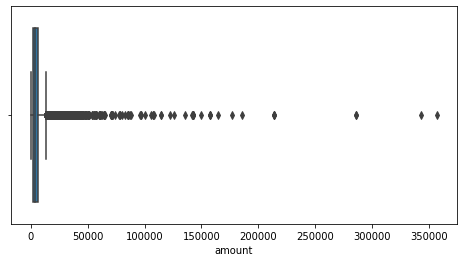

In [15]:
## 환불 거래 제거 함수를 통해 환불 거래를 제거합니다.
positive_data = remove_refund(train)
plt.figure(figsize=(8, 4))
sns.boxplot(positive_data['amount'])

다운 샘플링

In [16]:
# 5개의 행을 출력합니다.
positive_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0,2000.000000,2016-06-02 11:06:00


In [17]:
positive_data['year_month'] = positive_data['transacted_date'].str.slice(stop=7) ##7개만 slice
year_month = positive_data['year_month'].drop_duplicates() 
year_month

0       2016-06
145     2016-07
323     2016-08
494     2016-09
654     2016-10
821     2016-11
953     2016-12
1098    2017-01
1216    2017-02
1363    2017-03
1497    2017-04
1632    2017-05
1771    2017-06
1907    2017-07
2039    2017-08
2175    2017-09
2325    2017-10
2442    2017-11
2568    2017-12
2702    2018-01
2818    2018-02
2938    2018-03
3086    2018-04
3203    2018-05
3335    2018-06
3469    2018-07
3601    2018-08
3725    2018-09
3853    2018-10
3979    2018-11
4099    2018-12
4241    2019-01
4374    2019-02
Name: year_month, dtype: object

In [18]:
positive_data.groupby(['store_id', 'year_month']).amount.sum() ##series 

store_id  year_month
0         2016-06       7.470000e+05
          2016-07       1.005000e+06
          2016-08       8.697143e+05
          2016-09       8.978571e+05
          2016-10       8.354286e+05
                            ...     
9         2017-12       3.337143e+05
          2018-01       2.954286e+05
          2018-02       6.282857e+05
          2018-03       3.185714e+05
          2018-04       8.411429e+05
Name: amount, Length: 274, dtype: float64

In [19]:
a=pd.DataFrame(positive_data.groupby(['store_id', 'year_month']).amount.sum()).reset_index(drop=False,inplace=False)
a

,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05
...,...,...,...
269,9,2017-12,3.337143e+05
270,9,2018-01,2.954286e+05
271,9,2018-02,6.282857e+05
272,9,2018-03,3.185714e+05


In [20]:
b=a[a['store_id']==0]
b.head()

,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05


In [21]:
start_time = min(b['year_month'])
start_time

'2016-06'

In [22]:
## 월 단위 다운 샘플링 함수 정의
def month_resampling(df):
    new_data = pd.DataFrame() # 년도와 월을 합친 변수 생성, 새로운 데이터 지정
    df['year_month'] = df['transacted_date'].str.slice(stop=7) ##7개만 slice
    year_month = df['year_month'].drop_duplicates() # 데이터의 년도/월 하나씩 전체 기간 추출
    downsampling_data = df.groupby(['store_id', 'year_month']).amount.sum() # 상점 아이디 별 월 단위 매출액의 총합 데이터 셋 ##series 형태
    downsampling_data = pd.DataFrame(downsampling_data)  ## 데이터 프레임 형성 
    downsampling_data = downsampling_data.reset_index(drop=False,inplace=False) ## index reset 정리
    for i in tqdm(df['store_id'].unique()): #상점별로 데이터 하나씩 선택
        store = downsampling_data[downsampling_data['store_id']==i] ## 해당 i별 하나씩 ID 데이터 셋
        start_time = min(store['year_month']) # 각 상점의 처음 매출이 발생한 월
        store = store.merge(year_month,how='outer')
        store = store.sort_values(by=['year_month'], axis=0, ascending=True) # 데이터를 시간순으로 정렬
        store['amount'] = store['amount'].fillna(2)   # 매출이 발생하지 않는 amount는 0로 채움
        store['store_id'] = store['store_id'].fillna(i)  # 상점 아이디 결측치를 채움
        store = store[store['year_month']>=start_time]  # 처음 매출이 발생한 월 이후만 추출
        new_data = pd.concat([new_data,store],axis=0) ## concat해서 새로운 데이터 생성  
    return new_data

In [23]:
# 환불 제거 데이터를 월 단위로 다운 샘플링합니다.
resampling_data = month_resampling(positive_data)
resampling_data['store_id'] = resampling_data['store_id'].astype(int)
resampling_data

100%|██████████| 9/9 [00:00<00:00, 124.20it/s]


,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05
...,...,...,...
28,9,2018-10,2.000000e+00
29,9,2018-11,2.000000e+00
30,9,2018-12,2.000000e+00
31,9,2019-01,2.000000e+00


*시리즈 객체 변환, plot확인*

In [24]:
# 데이터프레임을 Series로 변환하는 함수
def time_series(df, i):  # 상점별로 데이터를 뽑습니다.
    store = df[df['store_id']==i]   ## 날짜 지정 범위는 영업 시작 월부터 2019년 3월 전까지 영업 마감일 기준
    index = pd.date_range(min(store['year_month']),'2019-03',freq='BM')  ## index range 지정, freq='BM': 마지막 날 지정
    ts = pd.Series(store['amount'].values,index=index)  ## 시리즈 객체로 변환
    return ts
# 데이터프레임을 Series로 변환하는 함수

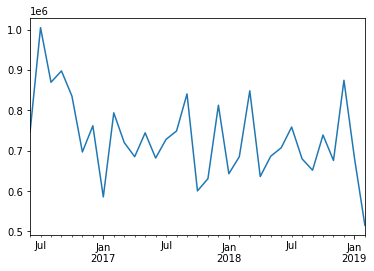

In [25]:
store_0 = time_series(resampling_data, 0)
store_0.plot()

## ADF Test

Augmented Dickey Fuller Test: 시계열 데이터가 정상성을 가지는 지 여부 확인

h0: 정상성을 가지지 않는다

ha: 정상성을 가진다 (평균과 분산이 대체로 일정)

만약, 정상성을 가지지 않으면 차분(differencing)을 통하여 평균을 일정하게 유지해야 한다. 


In [26]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 44.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [27]:
# pmdarima 패키지에 있는 ADFTest 클래스를 임포트
from pmdarima.arima import ADFTest

In [28]:
# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data, 0)
# ADF-Test 시행 (시리즈 객체에서 적용)
p_val, should_diff = ADFTest().should_diff(store_0)
print('p_val : %f , should_diff : %s' %(p_val, should_diff))

p_val : 0.022488 , should_diff : False


In [29]:
## ARIMA 모델의 차분 여부를 결정하기 위한 단위근 검정
def adf_test(y):
    return ADFTest().should_diff(y)[0] ##p-value만 선택

In [30]:
adf_p = [] ##모든 p_value리스트 저장
count = 0
skipped = []

for i in tqdm(resampling_data['store_id'].unique()):
    ts = time_series(resampling_data,i)
    try:
        p_val = adf_test(ts)  ##p-value
        if p_val < 0.05:
            count += 1 ## ADFTest통과한 count 갯수 누적, 정상성 인정
        adf_p.append(p_val) ##모든 p_value리스트 저장
    except:
        skipped.append(i) ##정상성 인정 안된 id값 저장


100%|██████████| 9/9 [00:00<00:00, 152.18it/s]


In [31]:
len(adf_p)

9

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


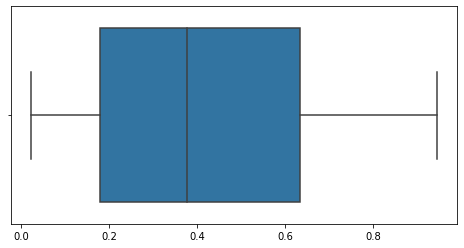

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(adf_p)

In [33]:
# p-value가 0.05보다 작은 상점의 개수: 7 (정상성)
print(count)

2


R패키지 import 😉

In [ ]:
from rpy2.robjects.packages import importr # rpy2 내의 패키지를 불러올 importr 클래스
utils = importr('utils') # utils 패키지를 임포트

utils.install_packages('forecast') # r의 forecast 패키지 설치
utils.install_packages('forecastHybrid') # r의 forecastHybrid 패키지 설치

In [35]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

In [39]:
# pandas2ri를 활성화 
pandas2ri.activate()
auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산, ndiffs는 차분 d 
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""


In [41]:
# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

In [47]:
store_0 = resampling_data[resampling_data['store_id']==0] ## store_id==0 
start_year = int(min(store_0['year_month'])[:4]) # 영업 시작 년도, 년도: 앞 4개만 선택
start_month = int(min(store_0['year_month'])[5:]) # 영업 시작 월, 월: 5번째부터

In [51]:
start_month

6

In [49]:
# R의 ts 함수로 r의 time series 자료형으로 변환
train = ts(store_0['amount'], start=c(start_year, start_month), frequency=12) ## start=c(2016, 06)
train

array([ 747000.        , 1005000.        ,  869714.28571429,
        897857.14285714,  835428.57142857,  697000.        ,
        761857.14285714,  585642.85714286,  794000.        ,
        720257.14285714,  685285.71428571,  744428.57142857,
        682000.        ,  728285.71428571,  749000.        ,
        840857.14285714,  600571.42857143,  630857.14285714,
        812714.28571429,  643142.85714286,  685285.71428571,
        848428.57142857,  636142.85714286,  686428.57142857,
        707285.71428571,  758714.28571429,  679857.14285714,
        651857.14285714,  739000.        ,  676000.        ,
        874571.42857143,  682857.14285714,  515285.71428571])

In [63]:
#ensemble model
forecast = auto_arima(train)
np.sum(forecast.values) # 3개월 매출을 합산

2007226.9722140946

In [64]:
forecast

,amount
1,749824.220243
2,651124.443426
3,606278.308545


***시계열 모델링*** ***arima*** 

In [76]:
train

array([1.07142857e+05, 6.37142857e+05, 6.03571429e+05, 2.25428571e+05,
       2.87142857e+05, 3.44428571e+05, 3.52857143e+05, 2.08571429e+05,
       1.78571429e+05, 7.61714286e+05, 5.35000000e+05, 7.15714286e+05,
       6.72142857e+05, 6.34285714e+05, 3.33714286e+05, 2.95428571e+05,
       6.28285714e+05, 3.18571429e+05, 8.41142857e+05, 2.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       2.00000000e+00])

In [69]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)# str 형식으로 정의된 auto_arima
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = [] ## amount, 값 리스트

for i in tqdm(resampling_data['store_id'].unique()):
    temp = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(temp['year_month'])[:4]) ## 영업 시작 년도
    start_month = int(min(temp['year_month'])[5:]) ## 영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(temp['amount'], start=c(start_year, start_month), frequency=12) 
    # 자동회귀누적이동평균 model
    forecast = auto_arima(train)
    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(forecast).values)


100%|██████████| 9/9 [00:01<00:00,  8.04it/s]


In [71]:
resampling_data.store_id.unique()

array([0, 1, 2, 4, 5, 6, 7, 8, 9])

In [70]:
final_pred

[array([2007226.97221409]),
 array([288621.02225481]),
 array([1276695.13256118]),
 array([2697648.89849366]),
 array([646542.85714286]),
 array([7377000.00000001]),
 array([601955.67576143]),
 array([3894985.71428571]),
 array([7586.06341104])]

***지수 평활법***

단순 지수 평활법: 추세나 계절성이 없는 데이터를 다룰 때 단순하게 가장 최근에 관측 된 값에 더 가중치를 주는 방법

홀트의 선형추세 기법: 추세가 있는 데이터를 예측할 수 있게 단순 지수 평활법을 확장한 방법

R의 ets() 함수는 AIC 값을 최소로 하는 지수 평활 모델 추정, AIC 값이 낮을수록 좋은 모델이라고 판단

In [79]:

import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)# str 형식으로 정의된 ets
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    temp = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(temp['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(temp['year_month'])[5:]) # 영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(temp['amount'], start=c(start_year, start_month), frequency=12) 
    # 지수평활법l
    forecast = ets(train)
    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(forecast).values)

100%|██████████| 9/9 [00:00<00:00, 50.27it/s]


**STL (Seasonal and Trend decomposition using Loess) Decomposition**

: 시계열 데이터가 가진 시간 주기를 알고 있는 경우에 계절성과 추세 나머지 성분으로 분해하여 분석 기법

분해 목적은 전반적인 트렌드, 계절성등을 고려하여 정확한 모델을 생성하기 위함

-Python, statsmodels 패키지에서 분해 기능 제공

-STL 분해를 적용하고 지수평활법을 통해 예측까지 진행하는 경우에는 R의 forecast 패키지의 stlm()함수 이용

In [115]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()
stlm = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = stlm(ts, s.window="periodic") # STL 분해 후 지수평활법을 통한 예측 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r을 파이썬에서 사용 가능
stlm = robjects.r(stlm)# str 형식으로 정의된 stlm
ets = robjects.r(ets)# str 형식으로 정의된 ets
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = []
for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    data_len = len(store)
    
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12) 
    # STL 분해를 적용한 지수평활 model
    if data_len > 24:
        forecast = stlm(train)   ##최소 24개월 넘게 관측시엔 stlm forecast이용
    # 지수평활 model
    else:
        forecast = ets(train)    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(forecast).values)

시계열 데이터: 

***성능향상을 위한 방법***

1. 매출액의 로그 정규화 (변동계수-> groupby 적용 후에 한 아이디 당 매출액의 표준편차/평균) 기준선 0.3 이하면 로그값으로 변환. 0.3넘으면 그대로 
2. R 시계열 패키지를 이용한 forecastHybrid를 통한 앙상블

In [119]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log')# 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

# 0번 상점 추출
store_0 = resampling_data[resampling_data['store_id']==0]
start_year = int(min(store_0['year_month'])[:4]) # 영업 시작 년도
start_month = int(min(store_0['year_month'])[5:]) # 영업 시작 월

# train, test 분리
train = store_0[store_0.index <= len(store_0)-4]
test = store_0[store_0.index > len(store_0)-4]

# R의 ts 함수로 r의 time series 자료형으로 변환
train_log = ts(log(train['amount']), start=c(start_year, start_month), frequency=12) # log 정규화 
train = ts(train['amount'], start=c(start_year, start_month), frequency=12) # log 정규화를 하지 않음

# model arima
forecast_log = auto_arima(train_log)
forecast = auto_arima(train)

# pred
pred_log = np.sum(exp(forecast_log)).values #로그 역변환 후 3개월 합산
pred = np.sum(forecast).values #3개월 매출을 합산

# test(2018-12~2019-02)
test = np.sum(test['amount'])

# mae
print('log-regularization mae: ', abs(test-pred_log))
print('mae:', abs(test-pred))

log-regularization mae:  [2401.96648197]
mae: [5884.67406689]


In [120]:
# 매출 변동 계수를 구하는 함수, 변동계수 : 0.3이하면 log 적용
def coefficient_variation(df, i):
    cv_data = df.groupby(['store_id']).amount.std()/df.groupby(['store_id']).amount.mean()
    cv = cv_data[i]
    return cv

In [127]:
temp = resampling_data[resampling_data['store_id']==1]
temp.head()

,store_id,year_month,amount
0,1,2016-06,137214.285714
1,1,2016-07,163000.000000
2,1,2016-08,118142.857143
3,1,2016-09,90428.571429
4,1,2016-10,118071.428571


In [129]:
temp.groupby(['store_id']).amount.std()/temp.groupby(['store_id']).amount.mean()

store_id
1    0.241401
Name: amount, dtype: float64

In [122]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12) 
        # ets model (지수평활법)
        forecast_log = ets(train_log)
        final_pred.append(np.sum(exp(forecast_log).values))
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 지수평활법
        forecast = ets(train)
        final_pred.append(np.sum(forecast).values) 

100%|██████████| 9/9 [00:00<00:00, 42.15it/s]


R 시계열 패키지 forecastHybrid를 통한 앙상블

auto arima, ets, stlm

가중치는 동등하게

In [124]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

hybridModel = """
    function(ts){
        library(forecast)
        library(forecastHybrid)
        d_params=ndiffs(ts)
        hb_mdl<-hybridModel(ts, models="aes", # auto_arima, ets, stlm
                        a.arg=list(max.p=2, d=d_params), # auto_arima parameter
                        weight="equal") # 가중치를 동일하게 줌(평균)
        forecasted_data<-forecast(hb_mdl, h=3) # 이후 3개월(h=3)을 예측
        outdf<-data.frame(forecasted_data$mean)
        colnames(outdf)<-c('amount')
        outdf
    }
""" 

# r() 함수로 r 자료형을 파이썬에서 사용 가능
hybridModel = robjects.r(hybridModel)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12) 
        # 앙상블 예측
        forecast_log = hybridModel(train_log)
        final_pred.append(np.sum(exp(forecast_log)).values) 
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 앙상블 예측
        forecast = hybridModel(train)
        final_pred.append(np.sum(forecast).values)


  0%|          | 0/9 [00:00<?, ?it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 11%|█         | 1/9 [00:00<00:01,  4.66it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 22%|██▏       | 2/9 [00:00<00:01,  4.21it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 33%|███▎      | 3/9 [00:00<00:01,  4.40it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 44%|████▍     | 4/9 [00:00<00:00,  5.12it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 56%|█████▌    | 5/9 [00:00<00:00,  5.69it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 67%|██████▋   | 6/9 [00:01<00:00,  6.02it/s]R[write to console]: Fitting the auto.arima model

R[write to console]: Fitting the ets model

 78%|███████▊  | 7/9 [00:01<